In [1]:
import numpy as np

In [2]:
import matplotlib.pylab as lab

In [3]:
def split_area(point1 = 0, point2 = 9, N = 10):
    delta = (point2 - point1) / (N - 1)
    points = [(point1 + (delta*i)) for i in range(N)]
    return points

In [4]:
def f(x):
    return (x+1) * np.cos(1/x)

N = 50
M = 250
a = 1
b = (2 * np.pi) + 1

In [79]:
def f(x):
    return np.power(np.sin(x), np.cos(x))

N = 50
M = 250
a = 0
b = 3

## 1 Разбиение отрезка на N частей

In [80]:
points = split_area(a, b, N)
print(points)

[0.0, 0.061224489795918366, 0.12244897959183673, 0.18367346938775508, 0.24489795918367346, 0.30612244897959184, 0.36734693877551017, 0.42857142857142855, 0.4897959183673469, 0.5510204081632653, 0.6122448979591837, 0.673469387755102, 0.7346938775510203, 0.7959183673469388, 0.8571428571428571, 0.9183673469387755, 0.9795918367346939, 1.0408163265306123, 1.1020408163265305, 1.163265306122449, 1.2244897959183674, 1.2857142857142856, 1.346938775510204, 1.4081632653061225, 1.4693877551020407, 1.530612244897959, 1.5918367346938775, 1.653061224489796, 1.7142857142857142, 1.7755102040816326, 1.836734693877551, 1.8979591836734693, 1.9591836734693877, 2.020408163265306, 2.0816326530612246, 2.142857142857143, 2.204081632653061, 2.2653061224489797, 2.326530612244898, 2.387755102040816, 2.4489795918367347, 2.510204081632653, 2.571428571428571, 2.63265306122449, 2.693877551020408, 2.7551020408163263, 2.816326530612245, 2.877551020408163, 2.9387755102040813, 3.0]


## 2 Значение f(x) в узлах интерполяции

In [81]:
values = [f(x) for x in points]
print(values)

[0.0, 0.06150737406396708, 0.12408132481899611, 0.1879412418141863, 0.2529277764832866, 0.3186458573728963, 0.38453490458188766, 0.4499203501986797, 0.5140590575715293, 0.5761821830472826, 0.6355358478190664, 0.6914186819844317, 0.7432148308976599, 0.7904210121486035, 0.832666505575431, 0.8697254319019531, 0.9015212316152369, 0.9281238112853769, 0.9497403116060845, 0.966700821273484, 0.9794405867021297, 0.9884803447230999, 0.9944063481383898, 0.9978514908372033, 0.9994787069538558, 0.9999675566913394, 1.0000046572921593, 1.0002784034648562, 1.0014782734784806, 1.0042989559842357, 1.0094495768459, 1.017668475618698, 1.0297443080578865, 1.0465447847000298, 1.0690551841478149, 1.0984300578326074, 1.1360635443939642, 1.1836869279840128, 1.2435074099413852, 1.3184112338698581, 1.4122706977852308, 1.5304252031662806, 1.6804665895744766, 1.8735840202751952, 2.1270023132720555, 2.4687229867761613, 2.9475956335092035, 3.6573570692484108, 4.804116005922951, 6.9486576050791315]


## 3 Построить интерполяционный полином Лагранжа

In [82]:
def Lagrangian(x, points, values):
    accum = 0
    for i, (x_i, f_x_i) in enumerate(zip(points, values)):
        poli = 1
        
        for j, x_j in enumerate(points):
            if j == i:
                continue
            else:
                poli *= (x - x_j) / (x_i - x_j)
                
        accum += f_x_i * poli
        
    return accum

## 4 Разбиение отрезка на M частей

In [83]:
_points = split_area(a, b, M)
#print(_points)

## 5 Выведение таблицы

In [84]:
#print("|x_i       |f(x_i)    |L(x_i)    |")
#print("|----------|----------|----------|")
#for x_i, f_x_i, L_x_i in zip(_points, [f(x) for x in _points], [Lagrangian(x, points, values) for x in _points]):
#    print(f'|{x_i:.6f}  |{f_x_i:.6f}  |{L_x_i:.6f}  |')
#    print("|----------|----------|----------|")

## \* Графики \*

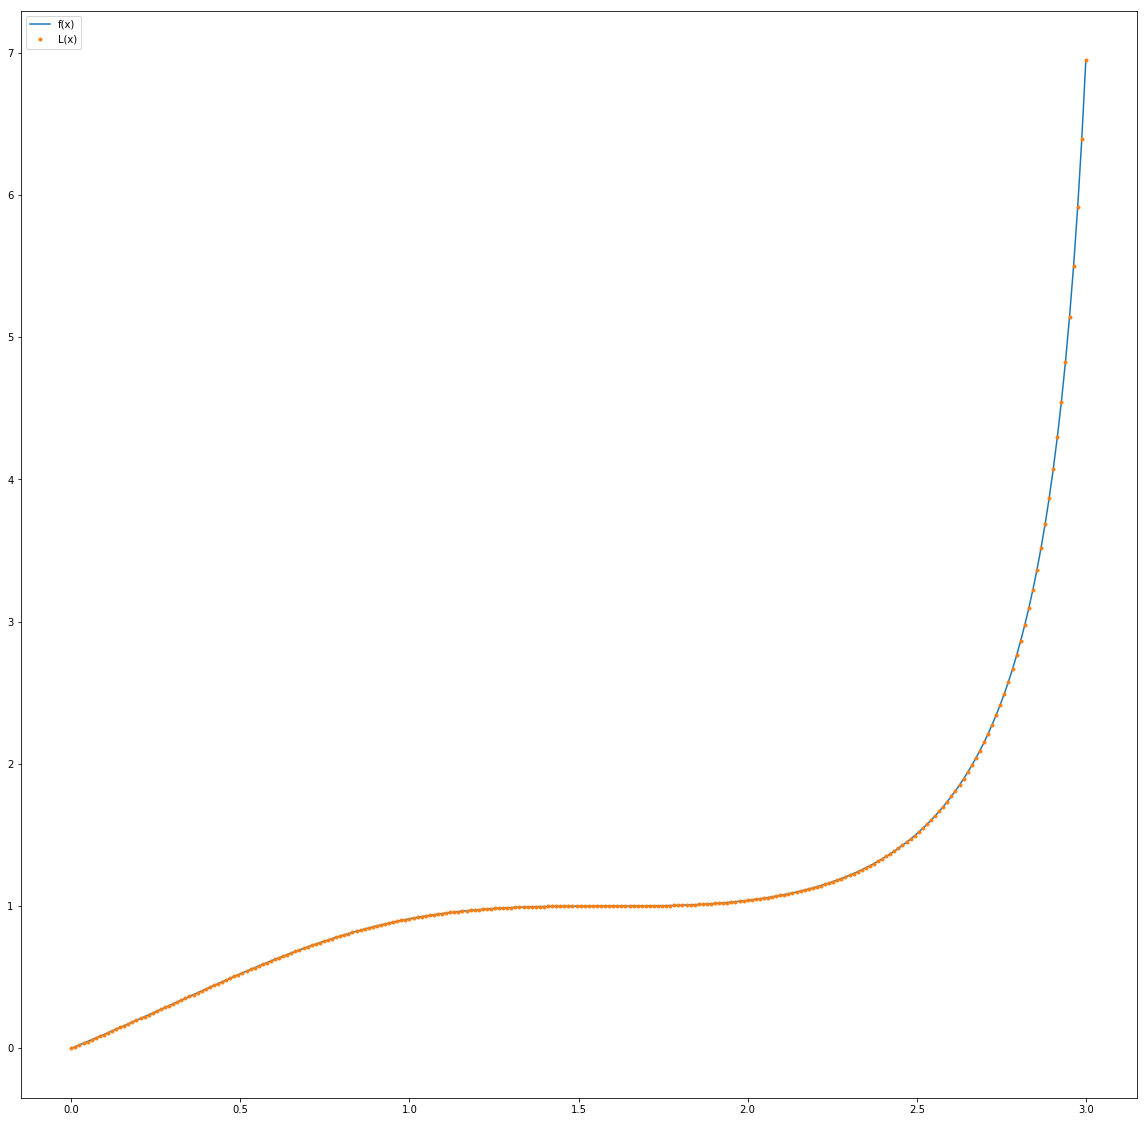

In [85]:
lab.figure(figsize=(20, 20))
lab.plot(_points, [f(x) for x in _points], '-')
lab.plot(_points, [Lagrangian(x, points, values) for x in _points], '.')
lab.legend(['f(x)', 'L(x)'], loc='upper left')